In [1]:
from batcher import Dataset

In [7]:
dataset = Dataset(max_len=100,preshuffle=False, batch_size=10)
dataset.ReadData('/s0/ajaech/reddit.tsv.bz2', ['subreddit', 'text'],
                 mode='all', limit=800000)

In [8]:
import collections
from matplotlib import pyplot
import numpy as np

In [9]:
def GetRatio(data):
    seen_words = set()
    word_count = 0
    results = []
    for line in data:
        for word in line:
            word_count += 1
            if word not in seen_words:
                results.append(word_count)
                seen_words.add(word)
    return results

In [10]:
groups = dataset.data.groupby('subreddit')

FlashTV 4860 54
funny 7014 141
nfl 6212 77
pcmasterrace 6255 68
GlobalOffensive 5224 122
todayilearned 6661 66
leagueoflegends 5661 189
nba 5921 124
hockey 5927 130
news 6166 99
videos 6288 102
pics 7015 95
AskReddit 7230 532


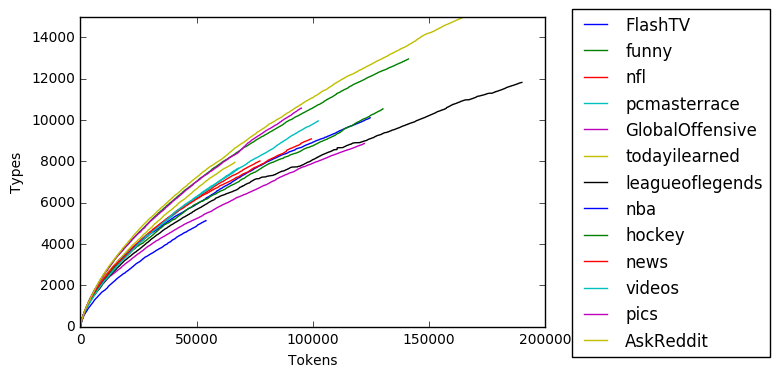

In [32]:
subreddits = ['FlashTV', 'funny', 'nfl', 'pcmasterrace', 'GlobalOffensive', 'todayilearned',
              'leagueoflegends', 'nba', 'hockey', 'news', 'videos', 'pics', 'AskReddit']
for subreddit in subreddits:
    counts = collections.Counter()
    results = GetRatio(groups.get_group(subreddit).text)
    pyplot.plot(results, np.arange(len(results)))
    print subreddit, np.argmin(np.array(results) < 50000), results[-1]/1000
# pyplot.yscale('log')
# pyplot.xscale('log')
pyplot.legend(subreddits, bbox_to_anchor=(1.5, 1.05))
pyplot.xlabel('Tokens')
pyplot.ylabel('Types')
pyplot.ylim([0,15000])
pyplot.xlim([0, 200000])
pyplot.show()

In [29]:
np.argmin(np.array(results) < 50000)

7230

In [14]:
results[-10:]

[532147,
 532156,
 532210,
 532221,
 532224,
 532263,
 532269,
 532292,
 532294,
 532327]